In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

In [2]:
ecom_data_df = pd.read_parquet("../data/olist_ecom.parquet")

In [19]:
ecom_data_df.sample(3)

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,time_to_approve,time_to_carrier,shipping_time,total_delivery_time,delivery_vs_estimate,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_score_string,RFM_score_composite,RFM_segment
2,2,b64ed91eab98972150bdaf77ca921934,3da7750bf3c1dbd724624a60a9f5942b,21310.0,rio de janeiro,RJ,d5691ee416fbe1f2d1b061319de61570,delivered,2018-05-10 03:48:37,2018-05-11 10:17:49,2018-05-12 08:55:00,2018-05-15 16:44:55,2018-06-14,1.0,debit_card,1.0,72.26,1.0,9ea1152d6d52dc57ab2ea49aa626adc1,e9779976487b77c6d4ac45f75ec7afe9,2018-05-18 10:17:49,54.0,18.26,beleza_saude,49.0,3037.0,1.0,1067.0,22.0,19.0,19.0,1.270278,0.942488,3.326331,5.539097,-29.302141,1,72.26,123,4,1,2,412,7,Single Buyers (Recent & Moderate/Low M)
3686,3686,53344341e1300beda6e4cdae3b6b3496,bf8e2ac0aef7f60dd02cbfe15b447804,2405.0,sao paulo,SP,09b8c1e504ab1fce7031c710bd8558d6,delivered,2017-09-12 10:10:03,2017-09-13 17:27:41,2017-09-14 15:16:26,2017-09-15 18:32:48,2017-10-02,1.0,credit_card,3.0,77.72,1.0,2c1cc48126c2bdca9e59a300ade4f1c8,850f4f8af5ea87287ac68de36e29107f,2017-09-19 17:27:41,69.0,8.72,brinquedos,41.0,603.0,1.0,600.0,18.0,13.0,15.0,1.303912,0.908854,1.136366,3.349132,-16.227222,1,77.72,363,2,1,2,212,5,Single Buyers (Moderate R & Moderate/Low M)
6787,6787,140840d08a638fb3c2427dd91d929fe2,1de85d557ce67dac394c9cfa0d203509,NaN,indaiatuba,SP,fd74ee83ca49ea03ce7b1e8d8aceba3f,delivered,2017-06-08 20:31:14,2017-06-08 20:45:19,2017-06-09 14:16:00,2017-06-13 11:39:49,2017-06-22,1.0,credit_card,10.0,213.54,1.0,82b73150f90f4fef92913e35b9984bb7,91f848e9f4be368f4318775aac733370,2017-06-14 20:45:19,0.0,11.87,utilidades_domesticas,40.0,545.0,3.0,2200.0,48.0,25.0,25.0,0.009780,0.729641,3.891539,4.630961,-8.514016,1,427.08,458,1,1,5,115,7,Single Buyers (Hibernating & High M)


## Descriptive Statistics for Recency, Frequency, Monetary

In [ ]:
ecom_data_df[["Recency", "Frequency", "Monetary"]].describe()

,Recency,Frequency,Monetary
count,7475.000000,7475.000000,7475.000000
mean,251.635987,1.005351,250.755609
std,153.046402,0.072961,642.292232
min,1.000000,1.000000,0.000000
25%,126.000000,1.000000,60.415000
50%,235.000000,1.000000,111.890000
75%,358.000000,1.000000,213.575000
max,705.000000,2.000000,11200.200000


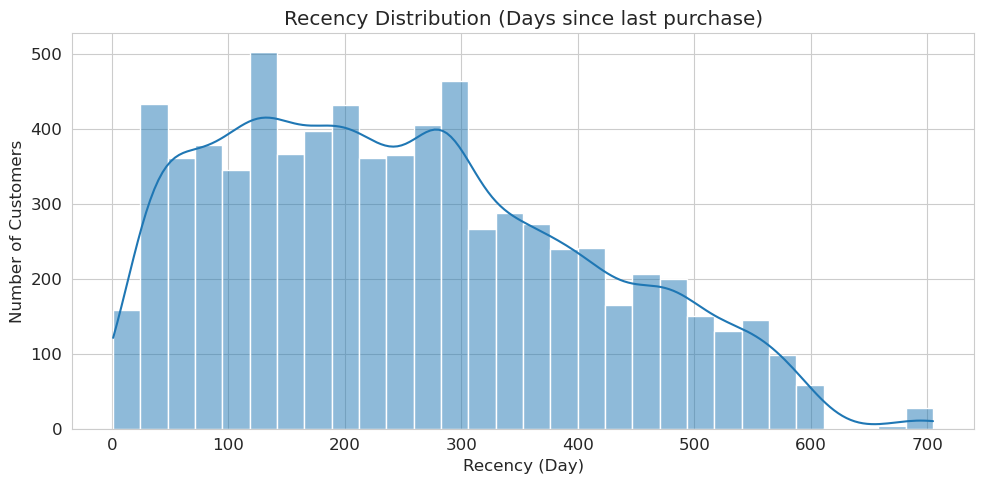

In [63]:
plt.figure(figsize=(10, 5))
# Plot Recency
sns.histplot(ecom_data_df["Recency"], bins=30, kde=True)
plt.title("Recency Distribution (Days since last purchase)")
plt.xlabel("Recency (Day)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Customers')

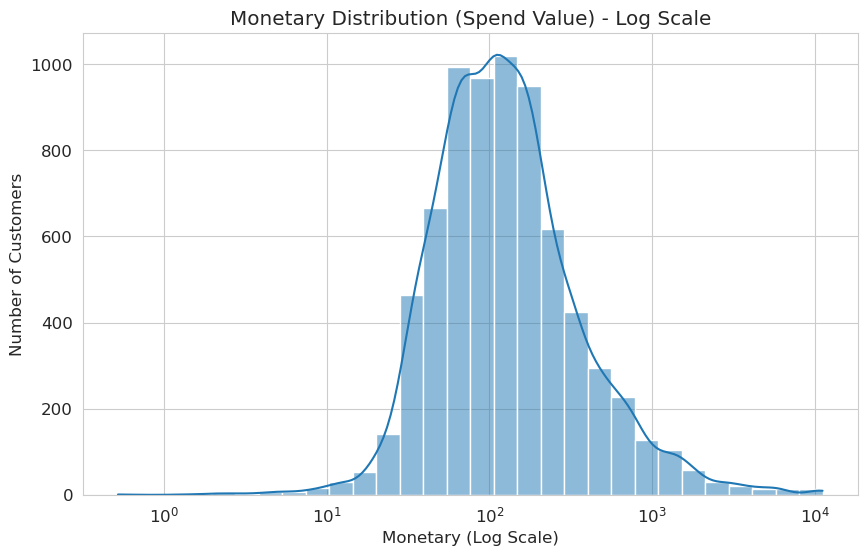

In [64]:
# Monetary Plot (using a log scale due to the highly skewed distribution)
sns.histplot(
    ecom_data_df[ecom_data_df["Monetary"] > 0]["Monetary"],
    bins=30,
    kde=True,
    log_scale=True,
)
plt.title("Monetary Distribution (Spend Value) - Log Scale")
plt.xlabel("Monetary (Log Scale)")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Number of Customers')

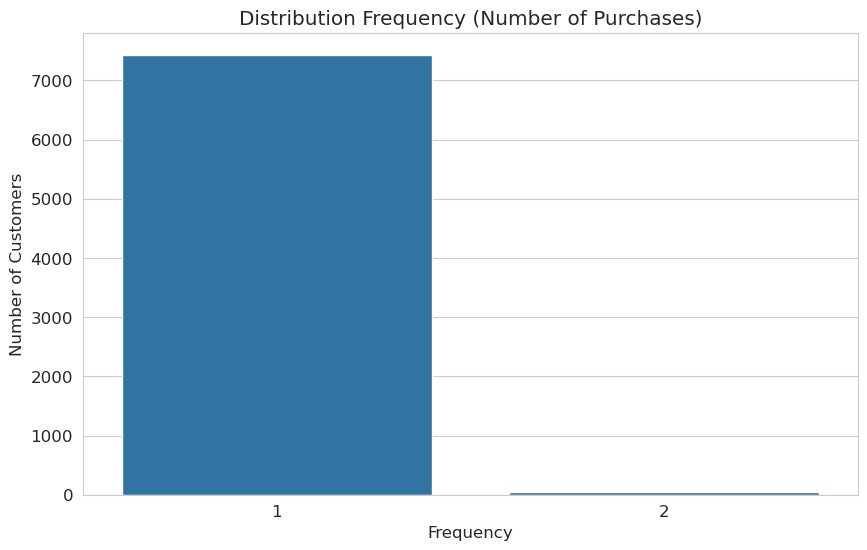

In [65]:
# Plot Frequency
sns.countplot(x="Frequency", data=ecom_data_df)
plt.title("Distribution Frequency (Number of Purchases)")
plt.xlabel("Frequency")
plt.ylabel("Number of Customers")

##  Distribution Frequency in column `Frequency` 

In [21]:
print(ecom_data_df["Frequency"].value_counts(normalize=True) * 100)

Frequency
1    99.464883
2     0.535117
Name: proportion, dtype: float64


In [84]:
frequency_distribution = ecom_data_df["Frequency"].value_counts(normalize=True) * 100
frequency_distribution = frequency_distribution.sort_values(ascending=False)

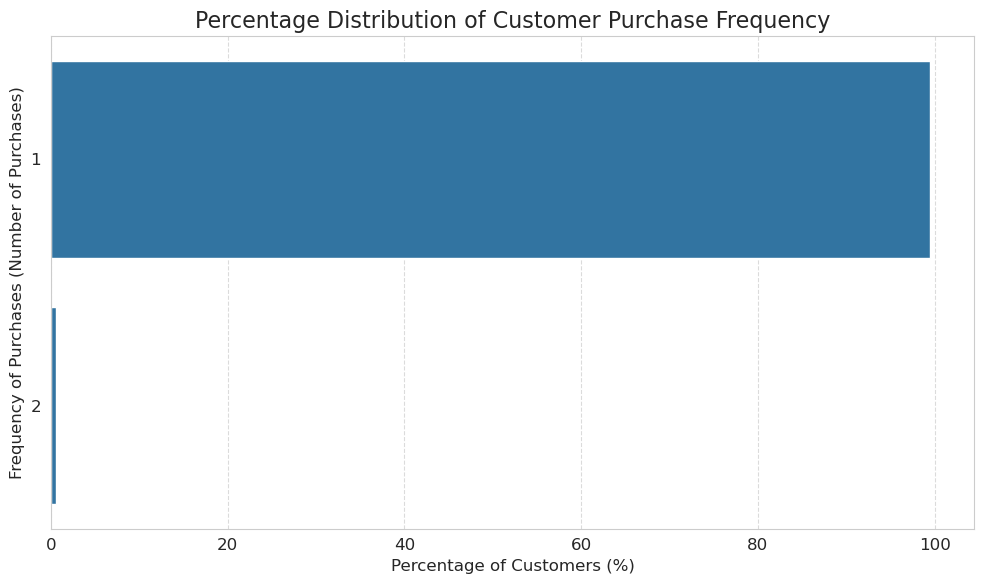

In [ ]:
sns.barplot(
    x=frequency_distribution.values,
    y=frequency_distribution.index.astype(str),
)
plt.title("Percentage Distribution of Customer Purchase Frequency", fontsize=16)
plt.xlabel("Percentage of Customers (%)", fontsize=12)
plt.ylabel("Frequency of Purchases (Number of Purchases)", fontsize=12)

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Distribution RFM Segment

In [24]:
print(ecom_data_df["RFM_segment"].value_counts(normalize=True) * 100)

RFM_segment
Single Buyers (Recent & Moderate/Low M)         22.929766
Single Buyers (Moderate R & Moderate/Low M)     22.327759
Single Buyers (Moderate R & High M)             18.220736
Single Buyers (High Value & Recent)             16.240803
Single Buyers (Hibernating & Moderate/Low M)    11.464883
Single Buyers (Hibernating & High M)             8.280936
Repeat Buyers (Champions)                        0.200669
Repeat Buyers (Less Recent & High M)             0.187291
Repeat Buyers (Less Recent & Moderate/Low M)     0.107023
Repeat Buyers (Recent & Moderate/Low M)          0.040134
Name: proportion, dtype: float64


In [ ]:
rfm_avg_per_segment = (
    ecom_data_df.groupby("RFM_segment")[["Recency", "Frequency", "Monetary"]]
    .mean()
    .reset_index()
)
rfm_avg_per_segment_melted = rfm_avg_per_segment.melt(
    id_vars="RFM_segment", var_name="Metric", value_name="Average Value"
)

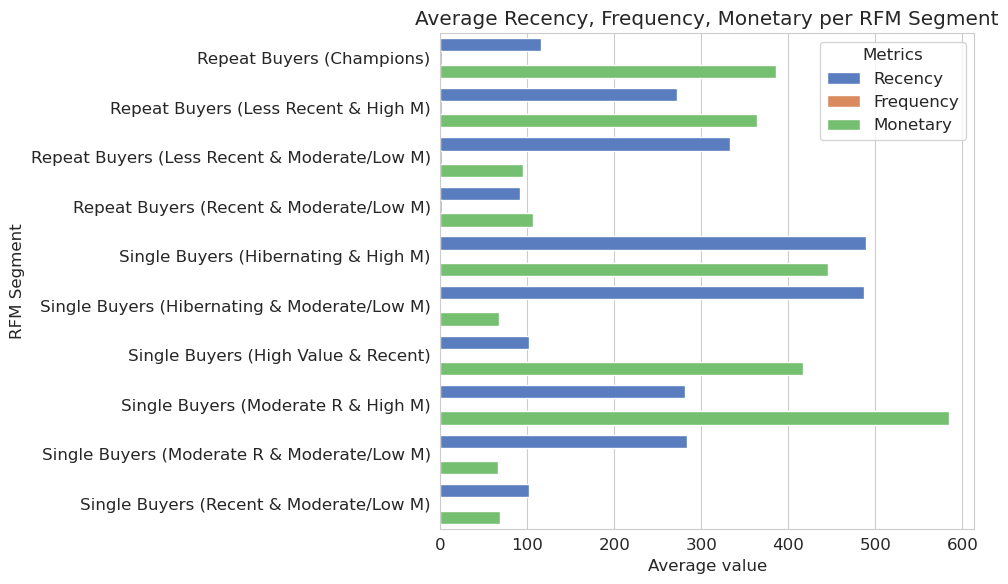

In [93]:
sns.barplot(
    x="Average Value",
    y="RFM_segment",
    hue="Metric",
    data=rfm_avg_per_segment_melted,
    palette="muted",
)
plt.title("Average Recency, Frequency, Monetary per RFM Segment")
plt.xlabel("Average value")
plt.ylabel("RFM Segment")
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## RFM Metrics Avarage per Segment

In [ ]:
display(
    ecom_data_df.groupby("RFM_segment")[["Recency", "Frequency", "Monetary"]].mean()
)

,Recency,Frequency,Monetary
RFM_segment,,,
Repeat Buyers (Champions),115.533333,2.0,385.926000
Repeat Buyers (Less Recent & High M),271.714286,2.0,363.770000
Repeat Buyers (Less Recent & Moderate/Low M),332.750000,2.0,94.585000
Repeat Buyers (Recent & Moderate/Low M),91.000000,2.0,106.250000
Single Buyers (Hibernating & High M),488.846527,1.0,445.729451
Single Buyers (Hibernating & Moderate/Low M),486.824971,1.0,67.271517
Single Buyers (High Value & Recent),101.682043,1.0,416.436837
Single Buyers (Moderate R & High M),280.687225,1.0,584.038194
Single Buyers (Moderate R & Moderate/Low M),283.026363,1.0,65.853625


In [103]:
delivery_metrics_avg = (
    ecom_data_df.groupby("RFM_segment")[["total_delivery_time", "delivery_vs_estimate"]]
    .mean()
    .reset_index()
)
delivery_metrics_avg_melted = delivery_metrics_avg.melt(
    id_vars="RFM_segment", var_name="Metric", value_name="Average Days"
)
delivery_metrics_avg_melted["Metric"] = delivery_metrics_avg_melted[
    "Metric"
].str.replace("_", " ")

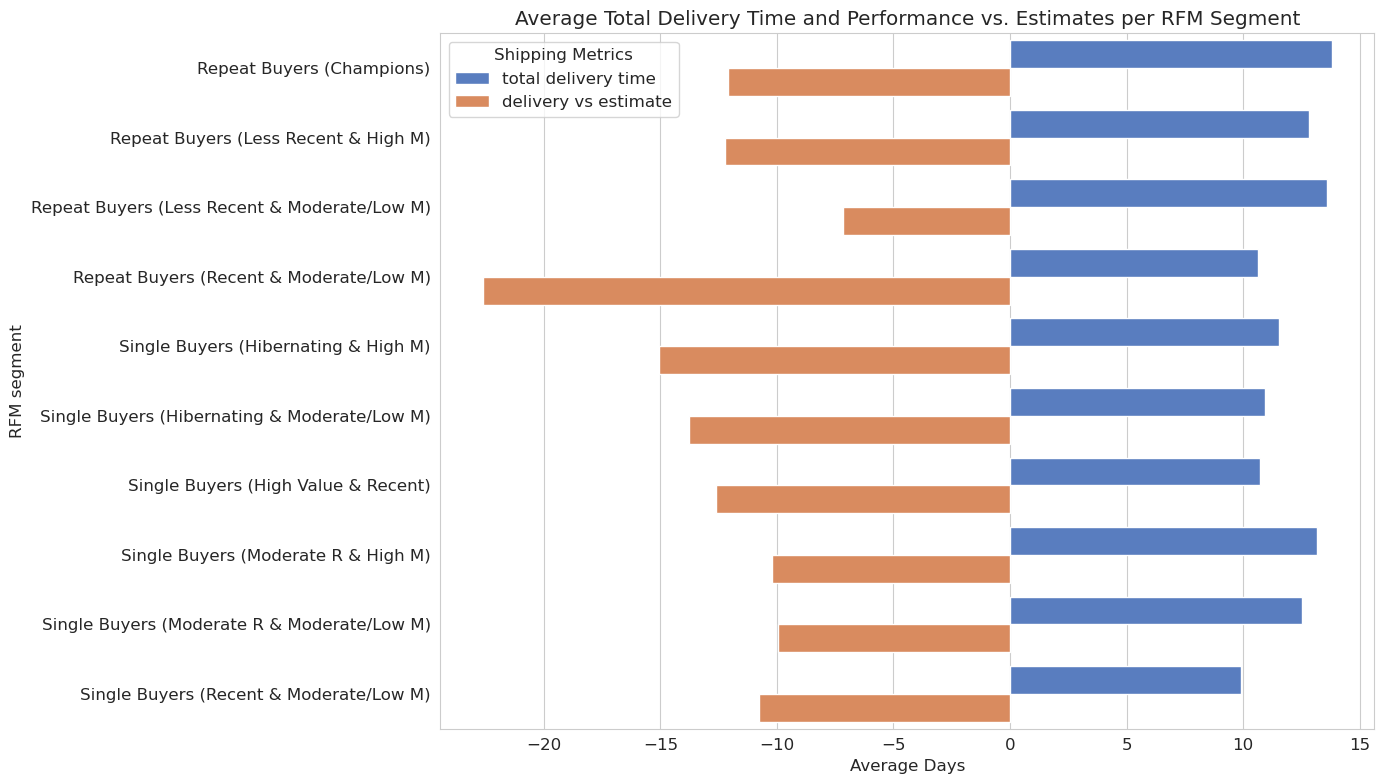

In [104]:
plt.figure(figsize=(14, 8))
sns.barplot(
    x="Average Days",
    y="RFM_segment",
    hue="Metric",
    data=delivery_metrics_avg_melted,
    palette="muted",
)
plt.title("Average Total Delivery Time and Performance vs. Estimates per RFM Segment")
plt.xlabel("Average Days")
plt.ylabel("RFM segment")
plt.legend(title="Shipping Metrics")
plt.tight_layout()
plt.show()

## More Detailed Customer Profiles per Segment

function to create top column based on column `RFM_segment`

In [42]:
def top_segment(df, col, top_n=5):
    """
    Analyzes the top N occurrences of a specific attribute within each RFM segment.

    Args:
    dataframe (pd.DataFrame): The input DataFrame containing 'RFM_segment'
                                and the 'attribute_column'.
    attribute_column (str): The name of the column to analyze (e.g., 'product_category_name').
    top_n (int): The number of top occurrences to display for each segment.

    Returns:
    None: Prints the analysis results directly.
    """
    print(f"top {top_n} {col.replace("_"," ").title()} per segment")
    
    # Calculate value counts per segment for the given attribute
    attribute_counts_per_segment = df.groupby('RFM_segment')[col].value_counts(normalize=True) * 100
    
    # Iterate through unique segments in the DataFrame
    for segment in df['RFM_segment'].unique():
        print(f"\n--- Segment: {segment} ---")
        
        # Check if the segment exists in the calculated counts
        if segment in attribute_counts_per_segment.index.get_level_values(0):
            # Access and print the top N for the current segment
            print(attribute_counts_per_segment.loc[segment].head(top_n))
        else:
            print("No data available for this segment.")

In [43]:
top_segment(ecom_data_df, "product_category_name")

top 5 Product Category Name per segment

--- Segment: Single Buyers (Recent & Moderate/Low M) ---
product_category_name
beleza_saude              10.501750
cama_mesa_banho            9.276546
esporte_lazer              7.001167
utilidades_domesticas      6.826138
informatica_acessorios     6.242707
Name: proportion, dtype: float64

--- Segment: Single Buyers (Moderate R & Moderate/Low M) ---
product_category_name
cama_mesa_banho     10.665069
esporte_lazer       10.065908
beleza_saude         7.789095
unknown_category     7.369682
telefonia            6.171360
Name: proportion, dtype: float64

--- Segment: Single Buyers (Hibernating & Moderate/Low M) ---
product_category_name
unknown_category    10.501750
cama_mesa_banho      9.684947
moveis_decoracao     9.334889
esporte_lazer        8.401400
beleza_saude         7.817970
Name: proportion, dtype: float64

--- Segment: Single Buyers (Hibernating & High M) ---
product_category_name
cama_mesa_banho          9.531502
moveis_decoracao     

In [44]:
top_segment(ecom_data_df, "customer_state")

top 5 Customer State per segment

--- Segment: Single Buyers (Recent & Moderate/Low M) ---
customer_state
SP     45.507585
RJ     10.910152
MG     10.326721
N/A     6.417736
PR      4.492415
Name: proportion, dtype: float64

--- Segment: Single Buyers (Moderate R & Moderate/Low M) ---
customer_state
SP     42.840024
RJ     12.222888
MG     11.084482
N/A     5.632115
RS      5.272618
Name: proportion, dtype: float64

--- Segment: Single Buyers (Hibernating & Moderate/Low M) ---
customer_state
SP     39.906651
RJ     12.252042
MG     10.268378
N/A     6.767795
PR      5.600933
Name: proportion, dtype: float64

--- Segment: Single Buyers (Hibernating & High M) ---
customer_state
SP     31.825525
RJ     14.378029
MG     12.116317
N/A     6.623586
BA      4.846527
Name: proportion, dtype: float64

--- Segment: Single Buyers (Moderate R & High M) ---
customer_state
SP     32.305433
RJ     14.464023
MG     12.041116
N/A     5.580029
RS      5.066079
Name: proportion, dtype: float64

--- Segme

In [45]:
top_segment(ecom_data_df, "payment_type")

top 5 Payment Type per segment

--- Segment: Single Buyers (Recent & Moderate/Low M) ---
payment_type
credit_card    72.287048
boleto         20.186698
voucher         5.600933
debit_card      1.925321
Name: proportion, dtype: float64

--- Segment: Single Buyers (Moderate R & Moderate/Low M) ---
payment_type
credit_card    71.899341
boleto         18.873577
voucher         8.388256
debit_card      0.838826
Name: proportion, dtype: float64

--- Segment: Single Buyers (Hibernating & Moderate/Low M) ---
payment_type
credit_card    71.761960
boleto         18.669778
voucher         8.401400
debit_card      1.166861
Name: proportion, dtype: float64

--- Segment: Single Buyers (Hibernating & High M) ---
payment_type
credit_card    74.474960
boleto         19.063005
voucher         6.138934
debit_card      0.323102
Name: proportion, dtype: float64

--- Segment: Single Buyers (Moderate R & High M) ---
payment_type
credit_card    75.550661
boleto         20.190896
voucher         3.450808
debit

In [105]:
key_segments = [
    "Single Buyers (High Value & Recent)",
    "Single Buyers (Moderate R & High M)",
    "Single Buyers (Hibernating & High M)",
    "Repeat Buyers (Champions)",
]

### Top 5 Category Product

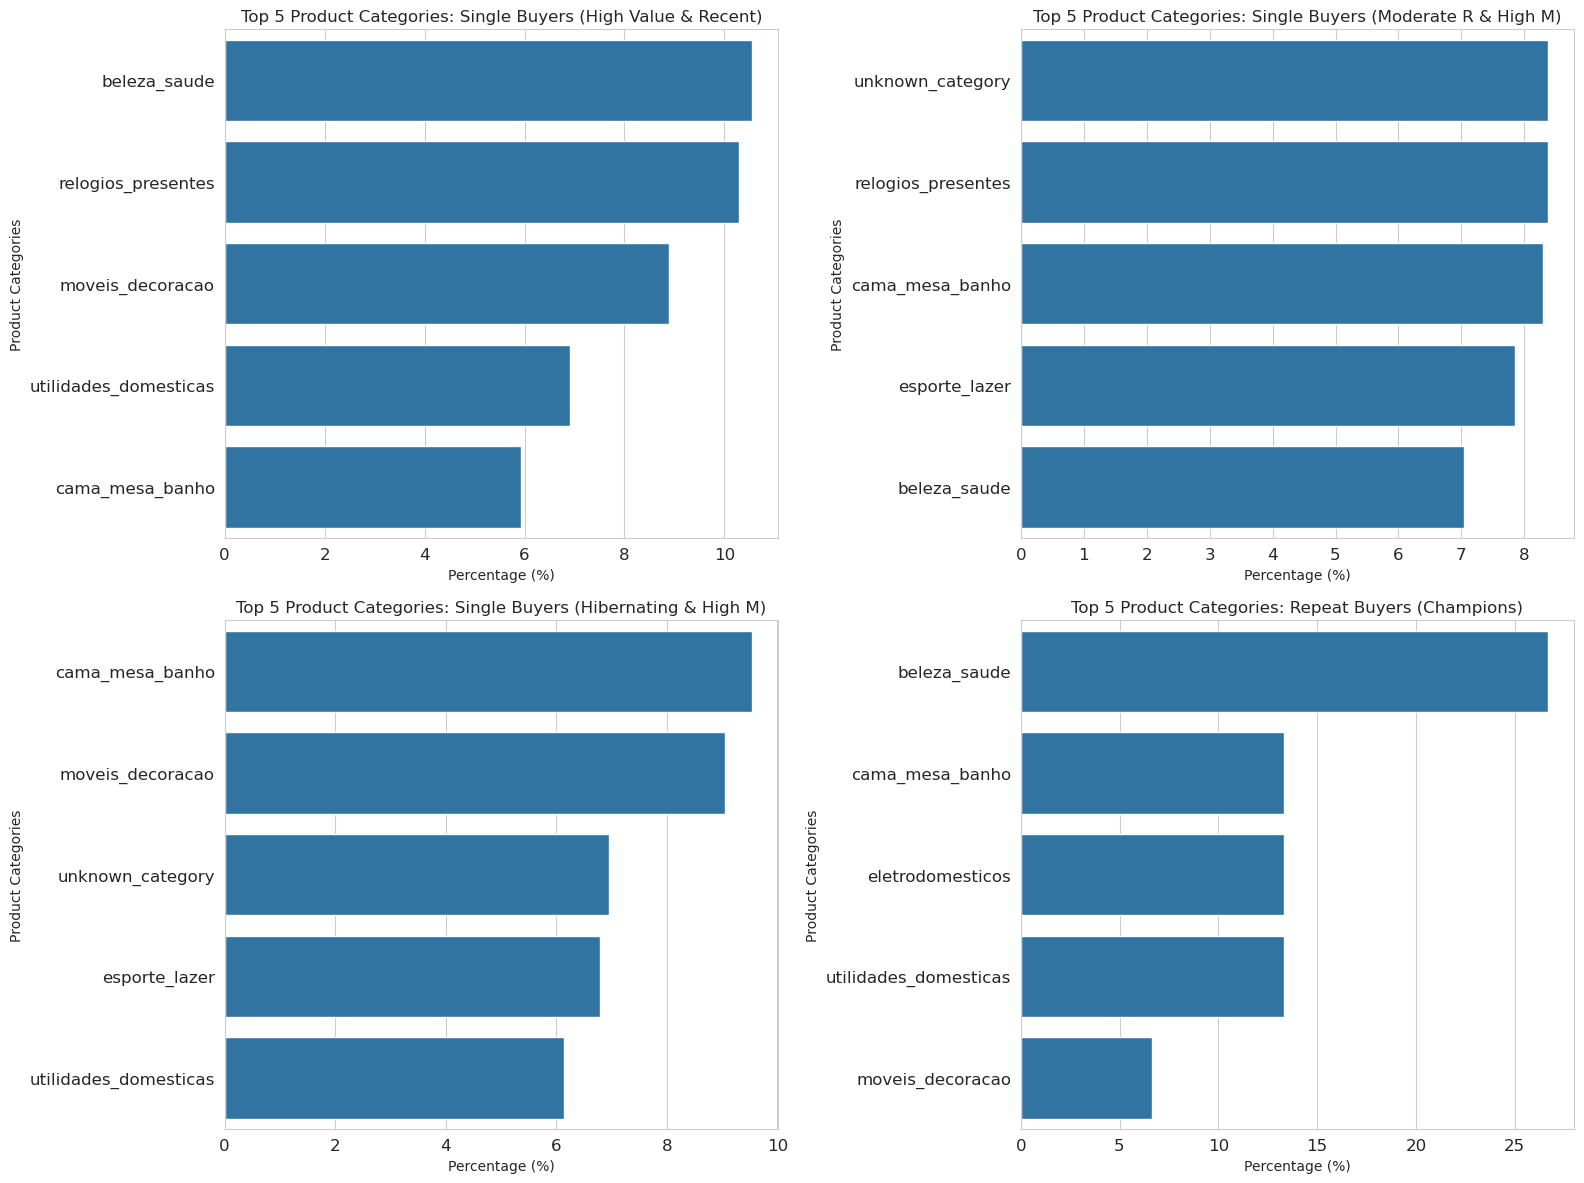

In [108]:
plt.figure(figsize=(16, 12))
for i, segment in enumerate(key_segments):
    plt.subplot(2, 2, i + 1)
    segment_df = ecom_data_df[ecom_data_df["RFM_segment"] == segment]
    if not segment_df.empty:
        top_categories = (
            segment_df["product_category_name"].value_counts(normalize=True).head(5)
            * 100
        )
        sns.barplot(x=top_categories.values, y=top_categories.index)
        plt.title(f"Top 5 Product Categories: {segment}", fontsize=12)
        plt.xlabel("Percentage (%)", fontsize=10)
        plt.ylabel("Product Categories", fontsize=10)
    else:
        plt.title(f"There is no data for this segment: {segment}", fontsize=12)
        plt.text(
            0.5,
            0.5,
            "No data available",
            horizontalalignment="center",
            verticalalignment="center",
            transform=plt.gca().transAxes,
        )

plt.tight_layout()
plt.show()

### Top 5 Payment Type

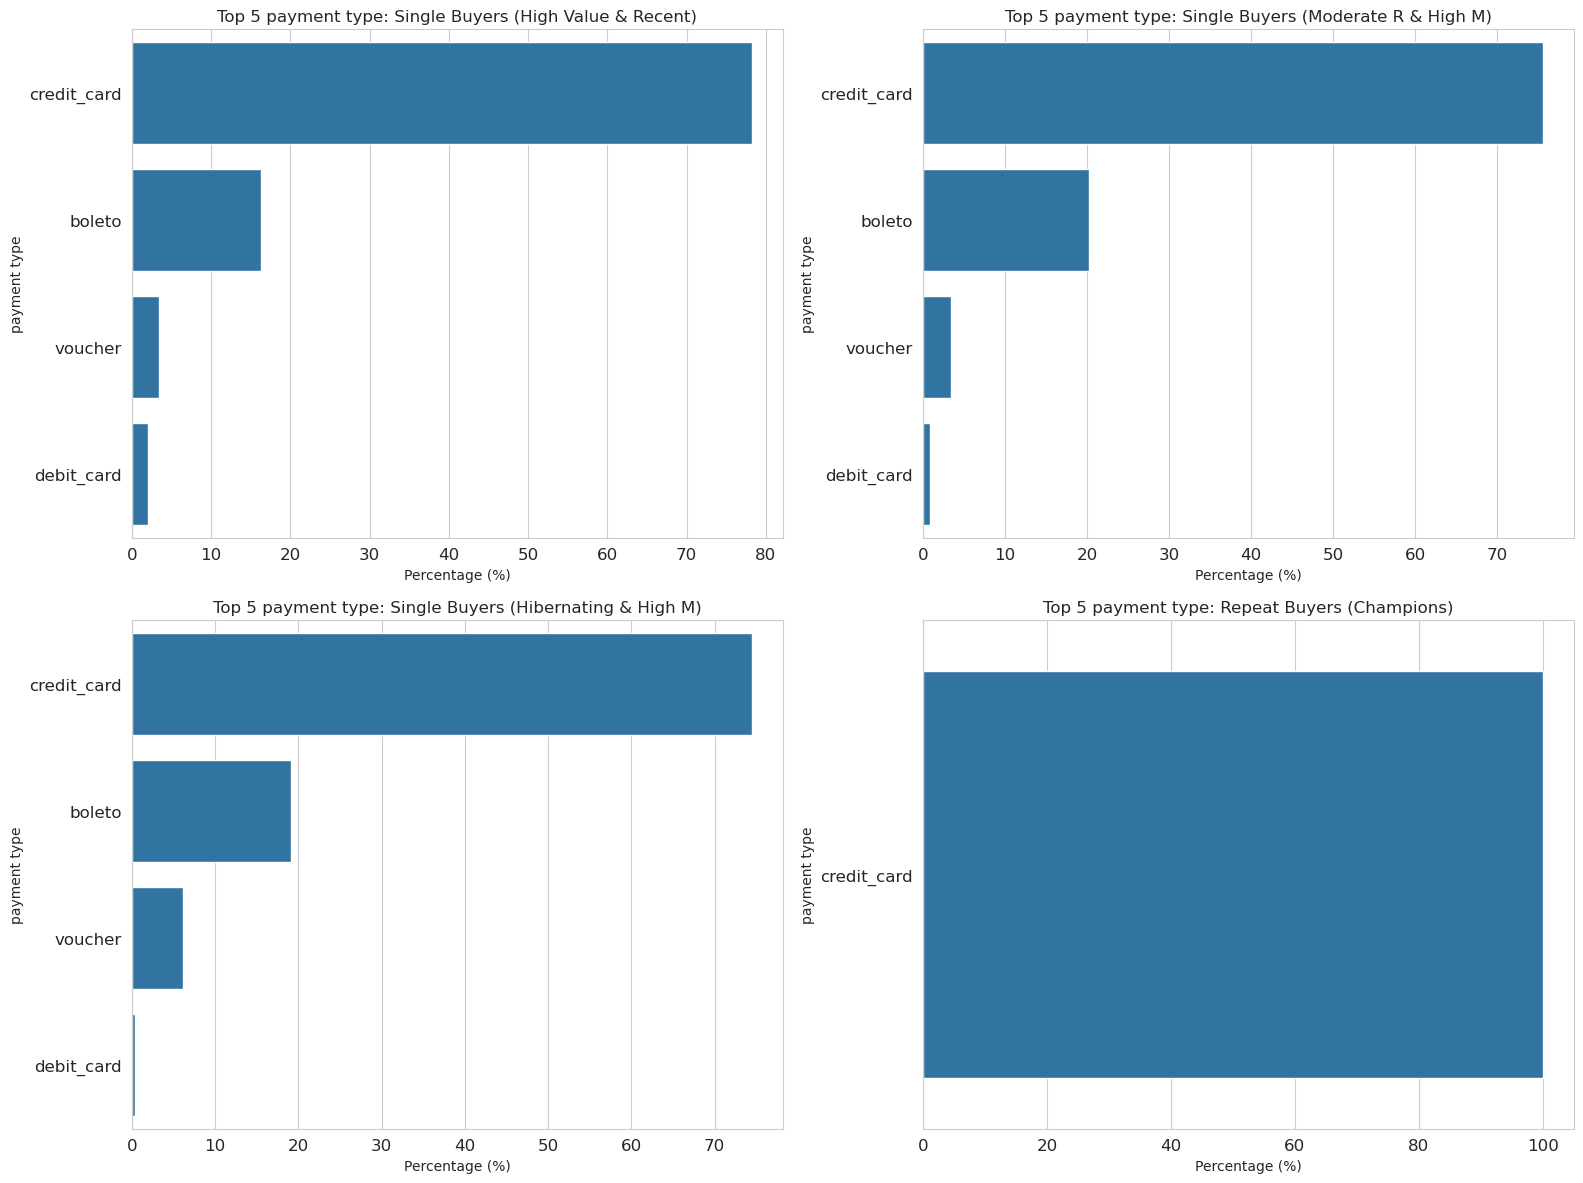

In [ ]:
plt.figure(figsize=(16, 12))
for i, segment in enumerate(key_segments):
    plt.subplot(2, 2, i + 1)
    segment_df = ecom_data_df[ecom_data_df["RFM_segment"] == segment]
    if not segment_df.empty:
        top_categories = (
            segment_df["payment_type"].value_counts(normalize=True).head(5) * 100
        )
        sns.barplot(x=top_categories.values, y=top_categories.index)
        plt.title(f"Top 5 payment type: {segment}", fontsize=12)
        plt.xlabel("Percentage (%)", fontsize=10)
        plt.ylabel("payment type", fontsize=10)
    else:
        plt.title(f"There is no data for this segment: {segment}", fontsize=12)
        plt.text(
            0.5,
            0.5,
            "No data available",
            horizontalalignment="center",
            verticalalignment="center",
            transform=plt.gca().transAxes,
        )

plt.tight_layout()
plt.show()

### Top 5 Country State

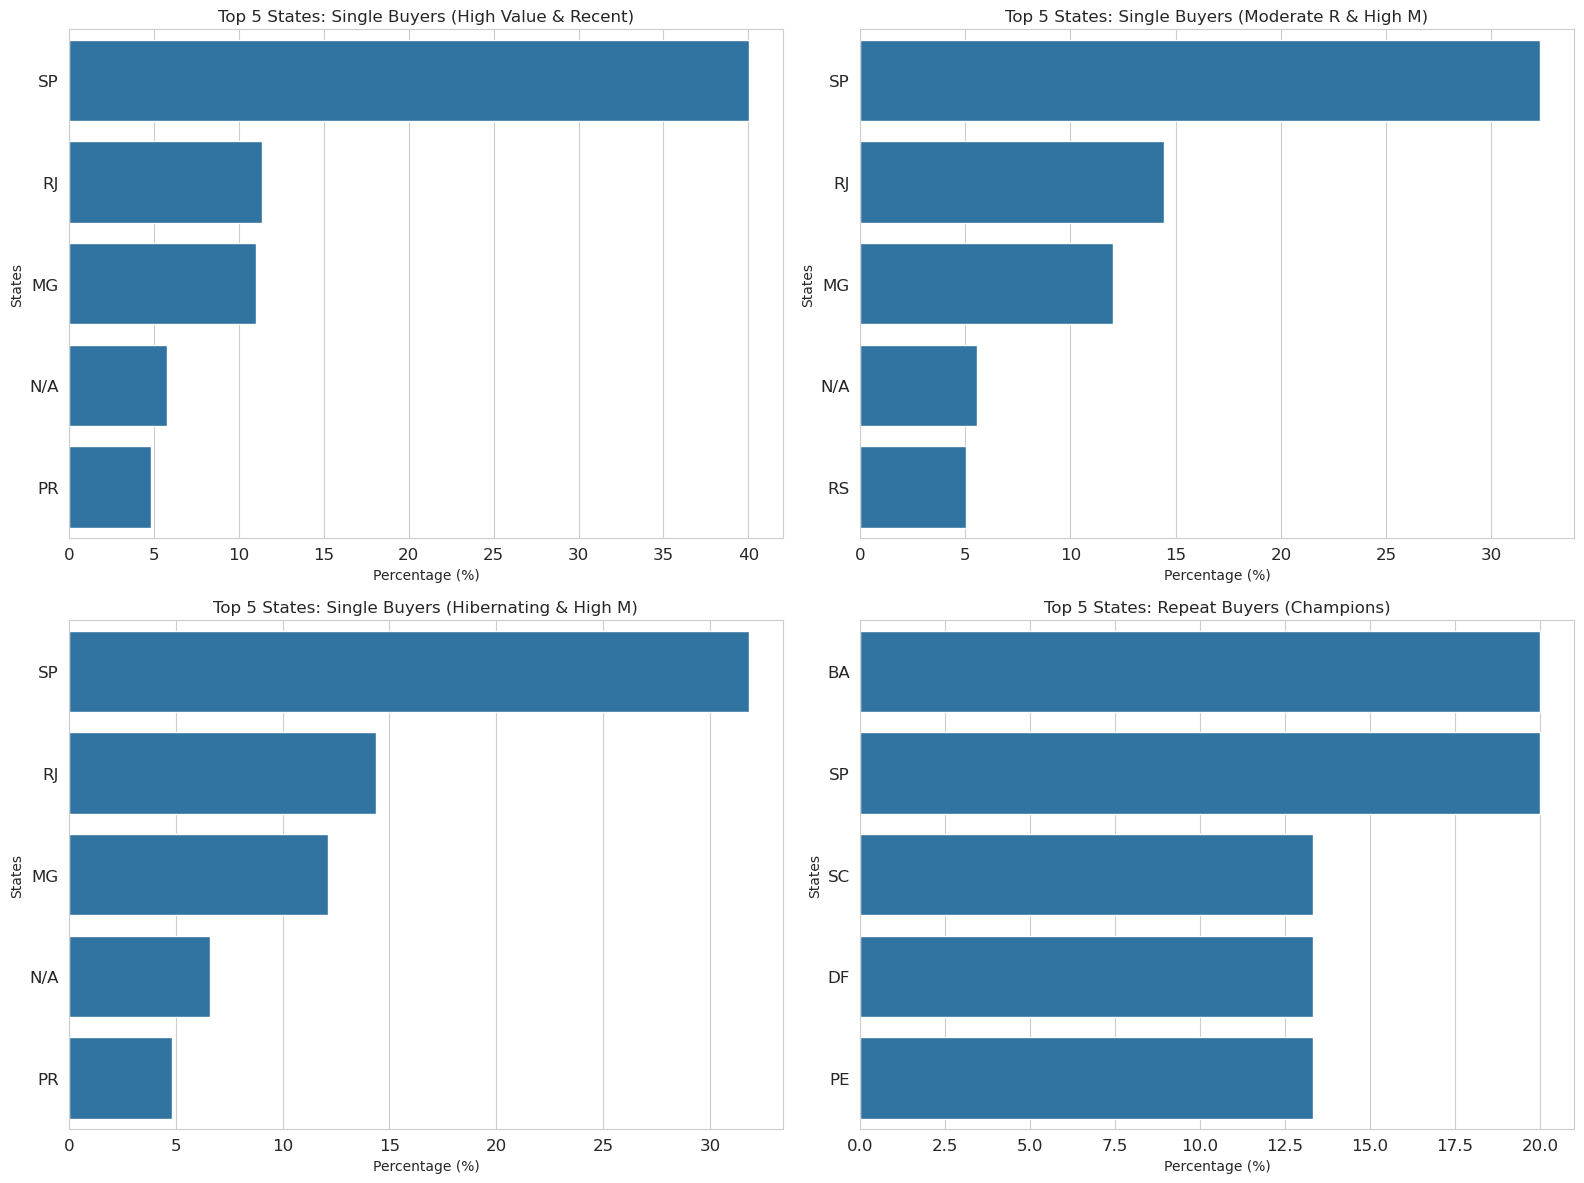

In [110]:
plt.figure(figsize=(16, 12))
for i, segment in enumerate(key_segments):
    plt.subplot(2, 2, i + 1)
    segment_df = ecom_data_df[ecom_data_df["RFM_segment"] == segment]
    if not segment_df.empty:
        top_categories = (
            segment_df["customer_state"].value_counts(normalize=True).head(5) * 100
        )
        sns.barplot(x=top_categories.values, y=top_categories.index)
        plt.title(f"Top 5 States: {segment}", fontsize=12)
        plt.xlabel("Percentage (%)", fontsize=10)
        plt.ylabel("States", fontsize=10)
    else:
        plt.title(f"There is no data for this segment: {segment}", fontsize=12)
        plt.text(
            0.5,
            0.5,
            "No data available",
            horizontalalignment="center",
            verticalalignment="center",
            transform=plt.gca().transAxes,
        )

plt.tight_layout()
plt.show()

## Average Delivery Performance Metrics per Segment

In [ ]:
delivery_cols = [
    "time_to_approve",
    "time_to_carrier",
    "shipping_time",
    "total_delivery_time",
    "delivery_vs_estimate",
]

# check the columns
if all(col in ecom_data_df.columns for col in delivery_cols):
    display(ecom_data_df.groupby("RFM_segment")[delivery_cols].mean())
else:
    print(
        "Some delivery columns were not found. Make sure the column names are exactly the same"
    )

,time_to_approve,time_to_carrier,shipping_time,total_delivery_time,delivery_vs_estimate
RFM_segment,,,,,
Repeat Buyers (Champions),-1.579353,4.161752,11.213184,13.795583,-12.086819
Repeat Buyers (Less Recent & High M),-0.726541,2.939307,10.607511,12.820277,-12.230647
Repeat Buyers (Less Recent & Moderate/Low M),-0.092224,2.304990,11.376256,13.589022,-7.162870
Repeat Buyers (Recent & Moderate/Low M),-0.464684,2.677450,8.444001,10.656767,-22.619502
Single Buyers (Hibernating & High M),-1.007320,3.319382,9.257268,11.541799,-15.063888
Single Buyers (Hibernating & Moderate/Low M),-0.503844,2.745928,8.696467,10.931662,-13.791240
Single Buyers (High Value & Recent),-0.386856,2.666814,8.443508,10.719086,-12.612150
Single Buyers (Moderate R & High M),-1.124425,3.468689,10.847895,13.180541,-10.231591
Single Buyers (Moderate R & Moderate/Low M),-0.716261,3.009198,10.253108,12.533100,-9.956529
